In [1]:
import numpy as np
import pandas as pd

In [2]:
data_dir = '/home/donald/Homework/9.26/Anuran_Calls_(MFCCs)/anuran_data.csv'
df = pd.read_csv(data_dir)

In [3]:
df.sample(3)

,Unnamed: 0,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,labels
5495,5495,1.0,0.411688,0.632660,0.444858,0.081459,0.073371,0.060098,-0.070580,0.085939,...,-0.073728,-0.106057,0.175804,0.039402,-0.074535,0.055579,-0.026558,-0.033212,0.122992,4
2943,2943,1.0,0.283994,0.176226,0.512543,0.131038,0.052635,-0.084059,0.040594,0.303001,...,-0.065310,-0.287079,0.057554,0.136976,-0.011246,-0.030171,-0.111902,0.051684,0.234526,8
6865,6865,1.0,0.418050,0.725933,0.321982,-0.251935,0.199197,0.215955,-0.192024,-0.060706,...,0.003375,0.022219,-0.009232,-0.030010,0.048708,0.001381,-0.074283,0.004601,0.052881,5


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
y = df.labels.values
num_class = len(np.unique(y))

In [6]:
y = np.reshape(y, (-1, 1))

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc = OneHotEncoder()

In [9]:
enc.fit(y)
y = enc.transform(y).toarray()
y.shape

(7195, 10)

In [10]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d1294ac50>,
      dtype=object)

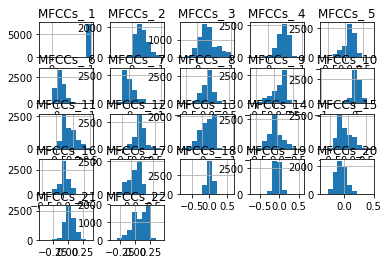

In [11]:
df.iloc[:,0:22].hist()

In [12]:
from sklearn.preprocessing import normalize
X = normalize(df.iloc[:,0:22].values)
X.shape

(7195, 22)

In [13]:
import tensorflow as tf

In [14]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Softmax

Using TensorFlow backend.


In [27]:
model = Sequential()
model.add(Dense(20, input_shape=(22,)))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_class, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                460       
_________________________________________________________________
dense_14 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_15 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                410       
Total params: 3,350
Trainable params: 3,350
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(train_X, train_y, batch_size=128, epochs=100)

Epoch 1/100
5036/5036 [==============================] - 0s 17us/step - loss: 0.1103 - acc: 0.9680
Epoch 2/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.1068 - acc: 0.9674
Epoch 3/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.1036 - acc: 0.9688
Epoch 4/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0988 - acc: 0.9706
Epoch 5/100
5036/5036 [==============================] - 0s 15us/step - loss: 0.0948 - acc: 0.9728
Epoch 6/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0953 - acc: 0.9706
Epoch 7/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0970 - acc: 0.9712
Epoch 8/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0929 - acc: 0.9728
Epoch 9/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0936 - acc: 0.9728
Epoch 10/100
5036/5036 [==============================] - 0s 15us/step - loss: 0.0898 - acc: 0.9750
Epoch 11/

5036/5036 [==============================] - 0s 14us/step - loss: 0.0454 - acc: 0.9863
Epoch 84/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0443 - acc: 0.9863
Epoch 85/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0444 - acc: 0.9873
Epoch 86/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0426 - acc: 0.9879
Epoch 87/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0425 - acc: 0.9885
Epoch 88/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0425 - acc: 0.9877
Epoch 89/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0446 - acc: 0.9865
Epoch 90/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0452 - acc: 0.9863
Epoch 91/100
5036/5036 [==============================] - 0s 15us/step - loss: 0.0437 - acc: 0.9871
Epoch 92/100
5036/5036 [==============================] - 0s 14us/step - loss: 0.0433 - acc: 0.9887
Epoch 93/100


In [ ]:
model.evaluate